# scikit-FIBERS Example Code

## Installation and Imports 
How to setup and use scikit-FIBERS

In [1]:
# !pip uninstall scikit-fibers --yes 

In [2]:
import pandas as pd
from skfibers import FIBERS
from sklearn.metrics import classification_report
from skfibers.experiments.datagen import create_data_simulation_bin
from skfibers.experiments.datagen_evolvable_threshold import create_data_simulation_bin_evolve

## Creating Simulation Data by provided functionality

In [3]:
data = create_data_simulation_bin_evolve(number_of_instances=10000, number_of_features=100, number_of_features_in_bin=10,
                                  no_fail_proportion=0.5, mm_frequency_range=(0.4, 0.5), noise_frequency=0.0,
                                  class0_time_to_event_range=(1.5, 0.2), class1_time_to_event_range=(1, 0.2),
                                  censoring_frequency=0.5, random_seed=42, negative=False, threshold=2)
data.to_csv('sampledata.csv')
data = pd.read_csv('sampledata.csv')
true_risk_group = data[['TrueRiskGroup']]
data = data.drop('TrueRiskGroup', axis=1)

In [ ]:
# cox_test_data = pd.read_csv('data.csv')
# AAs = ['A1', 'A10', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A12', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A13', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A139', 'A14', 'A140', 'A141', 'A142', 'A143', 'A144', 'A145', 'A146', 'A147', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A162', 'A163', 'A164', 'A165', 'A166', 'A167', 'A168', 'A169', 'A17', 'A170', 'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179', 'A18', 'A180', 'A181', 'A182', 'A183', 'A184', 'A185', 'A186', 'A187', 'A188', 'A189', 'A19', 'A190', 'A191', 'A192', 'A193', 'A194', 'A195', 'A196', 'A197', 'A198', 'A199', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A9', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99', 'C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194', 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']
# data = cox_test_data[AAs]
# data['grf_fail'] = cox_test_data['grf_fail']
# data['graftyrs'] = cox_test_data['graftyrs']
# true_risk_group = cox_test_data['grf_fail']

## Fitting FIBERS on the Data

In [5]:
fibers = FIBERS(label_name="Censoring", duration_name="Duration", 
# fibers = FIBERS(label_name="grf_fail", duration_name="graftyrs", 
                given_starting_point=False, start_point_feature_list=None, 
                feature_bins_start_point=None, iterations=100,
                set_number_of_bins=50, min_features_per_group=2,
                max_number_of_groups_with_feature=2,
                informative_cutoff=0.2, crossover_probability=0.8,
                mutation_probability=0.4, elitism_parameter=0.8,
                random_seed=42, set_threshold = 0, evolving_probability = 0.0,
                min_threshold = 0, max_threshold = 3,
                merge_probability = 0.2)
fibers = fibers.fit(data) 

100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.00it/s]


## Accessing results and internal functions

### Summary of Top Bin Statistics

In [7]:
bin_summary, logrank_results = fibers.get_bin_summary()
logrank_results

,0
Bin #,Bin 1
Top Bin of Features:,"['P_1', 'P_4', 'P_5']"
Log-Rank Score,1231.617993
Number of Instances with No Mismatches in Bin:,4410
Number of Instances with Mismatch(es) in Bin:,5590
p-value from Log Rank Test:,0.0
Threshold,0


### All Bins and coressponding Log-Rank Scores

In [8]:
fibers.get_bin_scores()

,Bin #,Score,Bins,Threshold
0,Bin 1,1231.617993,"['P_1', 'P_4', 'P_5']",0
1,Bin 2,1045.668579,"['P_4', 'P_9', 'P_10']",0
2,Bin 3,1039.741589,"['P_4', 'P_10', 'P_8']",0
3,Bin 45,1035.468112,"['P_9', 'P_1', 'P_8']",0
4,Bin 4,1023.926969,"['P_5', 'P_4']",0
5,Bin 5,1010.253663,"['P_10', 'P_8', 'P_1']",0
6,Bin 6,1005.124730,"['P_1', 'P_4']",0
7,Bin 7,933.870052,"['P_9', 'P_4']",0
8,Bin 8,928.648604,"['P_6', 'P_4']",0
9,Bin 9,923.825235,"['P_4', 'P_10']",0


### Viewing Kaplan Meier Survival Plot

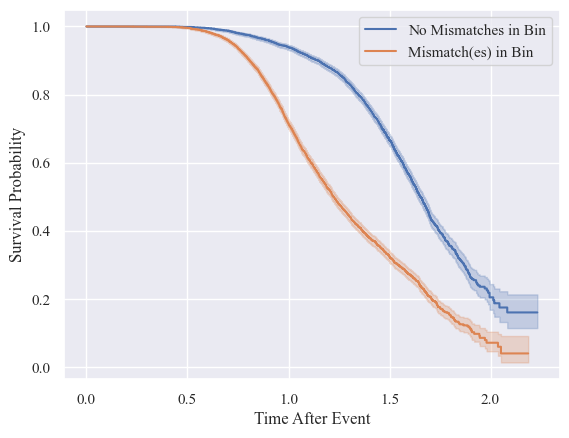

In [9]:
fibers.get_bin_survival_plot(show=True)

### Viewing Transformed Rules/Bins/Features

In [10]:
data_tranformed = fibers.transform(data)
data_tranformed

,Bin 1,Bin 2,Bin 3,Bin 45,Bin 4,Bin 5,Bin 6,Bin 7,Bin 8,Bin 9,...,Bin 40,Bin 44,Bin 48,Bin 41,Bin 47,Bin 42,Bin 46,Bin 50,Bin 43,Bin 49
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,3,2,1,3,1
1,2,0,1,2,1,2,1,0,1,0,...,2,1,1,0,0,1,1,1,2,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,2,1
3,3,1,1,1,2,1,2,1,1,1,...,2,2,1,1,0,2,2,1,4,4
4,0,1,1,0,0,1,0,0,0,1,...,1,0,1,0,0,2,1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,1,1,1,4,3
9996,1,0,0,1,0,1,1,0,0,0,...,1,2,1,0,0,3,2,0,2,2
9997,1,0,0,0,1,0,0,0,0,0,...,1,1,1,1,2,0,1,0,2,4
9998,2,1,1,0,2,0,1,1,2,1,...,2,1,2,0,1,2,3,0,1,3


### Checking Top Rule Train Accuracy

In [11]:
print("Accuracy: ", fibers.score(data, true_risk_group))

Accuracy:  0.785


In [12]:
y = fibers.predict(data)

In [13]:
print(classification_report(y, true_risk_group))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      4410
           1       0.84      0.75      0.80      5590

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.79      0.79      0.79     10000

